# 參考資料
- [Clustering 影片來源：Statistical Learning YT](https://www.youtube.com/watch?time_continue=1&v=aIybuNt9ps4)
- [Clustering Means Algorithm 影片來源： [ Machine Learning | Andrew Ng ] YT](https://www.youtube.com/watch?time_continue=4&v=hDmNF9JG3lo)
- [ Unsupervised Machine Learning:Flat Clustering](https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/)

# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

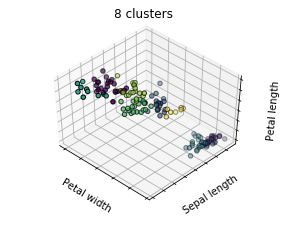

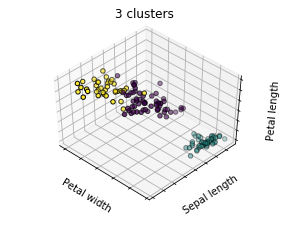

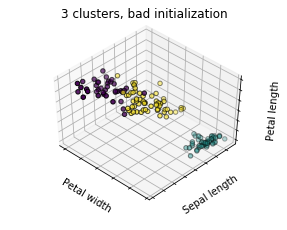

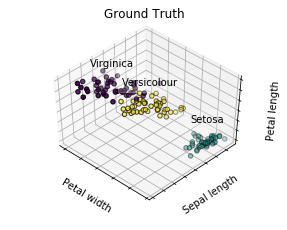

In [3]:
estimators= [('kmeans_8', KMeans(n_clusters=8)),
             ('kmeans_3', KMeans(n_clusters=3)),
             ('kmeans_3_bad_ini', KMeans(n_clusters=3, n_init=1))  #n_init defalut=10
            ]
fignum=1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(num=fignum, figsize=(4,3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    est.fit(X)
    labels = est.labels_  #Labels of each point
    
    ax.scatter(X[:, 3], X[:, 0], X[:,2],
               c=labels.astype(np.float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12